tgb - 9/28/2020 - Analyzing Liran's runs to design new real-geography NNs

In [2]:
from cbrain.imports import *
from cbrain.data_generator import *
from cbrain.cam_constants import *
from cbrain.losses import *
from cbrain.utils import limit_mem
from cbrain.layers import *
from cbrain.data_generator import DataGenerator
import tensorflow as tf
import tensorflow.math as tfm
#import tensorflow_probability as tfp
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import xarray as xr
import numpy as np
from cbrain.model_diagnostics import ModelDiagnostics
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as imag
import scipy.integrate as sin
#import cartopy.crs as ccrs
import matplotlib.ticker as mticker
#from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import pickle
# import sklearn
# from sklearn.linear_model import LinearRegression
# from scipy import stats

# Otherwise tensorflow will use ALL your GPU RAM for no reason

limit_mem()

In [6]:
path_folder = '/DFS-L/DATA/pritchard/liranp/CESM2_f19_v3_updated_NN_pelayout01_ens_07/run/'
path = 'CESM2_f19_v3_updated_NN_pelayout01_ens_07.cam.h1.2003-02-09-57600.nc'

In [8]:
data = xr.open_dataset(path_folder+path)

In [9]:
data

<xarray.Dataset>
Dimensions:          (ilev: 27, lat: 96, lev: 26, lon: 144, nbnd: 2, time: 16)
Coordinates:
  * lat              (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon              (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lev              (lev) float64 3.545 7.389 13.97 23.94 ... 929.6 970.6 992.6
  * ilev             (ilev) float64 2.194 4.895 9.882 ... 956.0 985.1 1e+03
  * time             (time) object 2003-02-09 16:00:00 ... 2003-02-09 23:30:00
Dimensions without coordinates: nbnd
Data variables:
    gw               (lat) float64 ...
    hyam             (lev) float64 ...
    hybm             (lev) float64 ...
    P0               float64 ...
    hyai             (ilev) float64 ...
    hybi             (ilev) float64 ...
    date             (time) int32 ...
    datesec          (time) int32 ...
    time_bnds        (time, nbnd) object ...
    date_written     (time) |S8 ...
    time_written     (time) |S8 ...
    ndbase           int

# List inputs

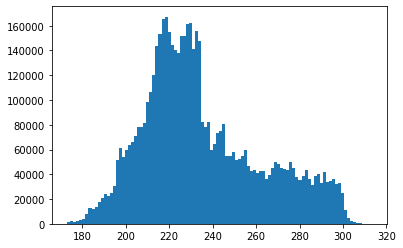

In [13]:
plt.hist(data.TBP.values.flatten(),bins=100);

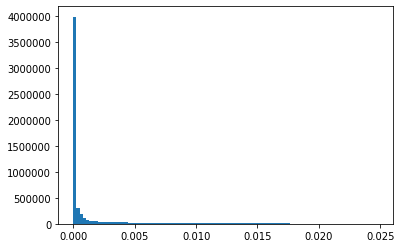

In [14]:
plt.hist(data.QBP.values.flatten(),bins=100);

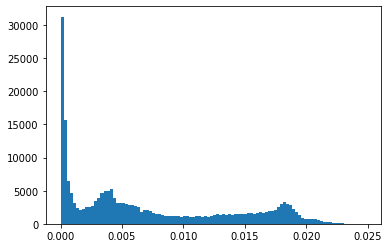

In [15]:
plt.hist(data.QBP[:,-1,:,:].values.flatten(),bins=100);

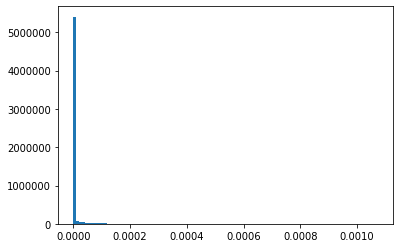

In [17]:
plt.hist(data.CLDLIQAP.values.flatten(),bins=100);

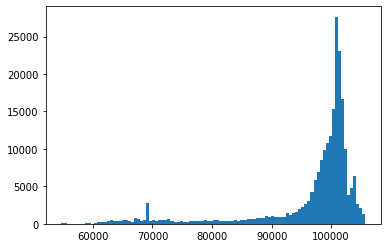

In [18]:
plt.hist(data.PS.values.flatten(),bins=100);

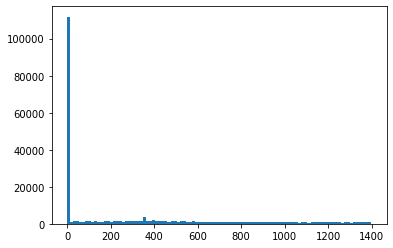

In [19]:
plt.hist(data.SOLIN.values.flatten(),bins=100);

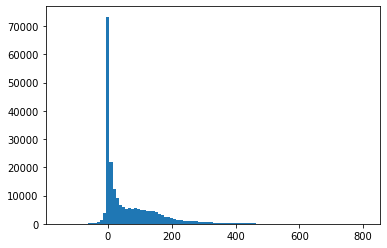

In [21]:
plt.hist(data.LHFLX.values.flatten(),bins=100);

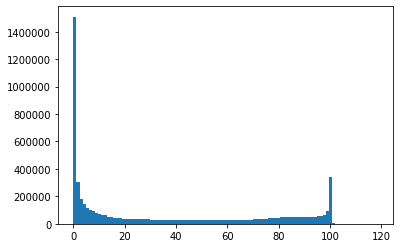

In [24]:
plt.hist(data.RELHUM.values.flatten(),bins=100);

# Outputs

In [28]:
TCTEND = (data.TBC-data.TBP)/DT

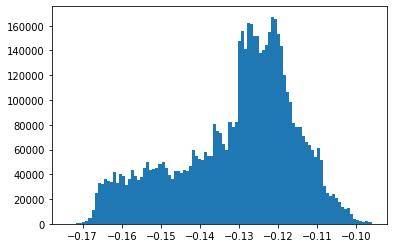

In [29]:
plt.hist(TCTEND.values.flatten(),bins=100);

In [42]:
TPTEND = (data.T-data.TBP)/DT

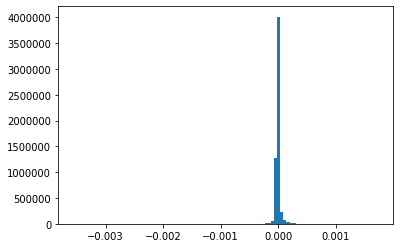

In [44]:
plt.hist(TPTEND.values.flatten(),bins=100);

In [31]:
QCTEND = (data.QBC-data.QBP)/DT

(0, 255000)

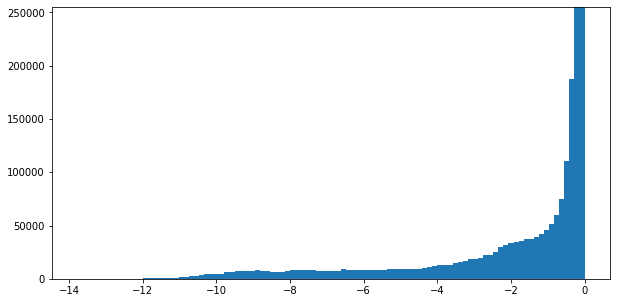

In [40]:
plt.figure(figsize=(10,5))
plt.hist(1e6*QCTEND.values.flatten(),bins=100);
plt.ylim((0,255000))

(0, 0.05)

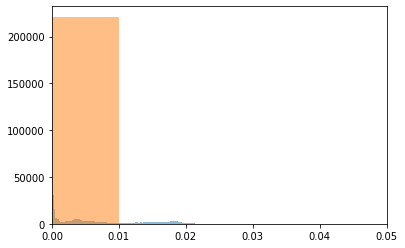

In [47]:
plt.hist(data.QBP[:,-1,:,:].values.flatten(),bins=100,alpha=0.5);
plt.hist(data.QBC[:,-1,:,:].values.flatten(),bins=100,alpha=0.5);
plt.xlim((0,0.05))

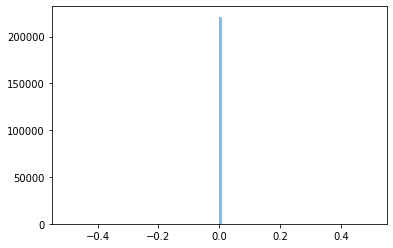

In [48]:
plt.hist(data.QBC[:,-1,:,:].values.flatten(),bins=100,alpha=0.5);

In [49]:
path_otherday = 'CESM2_f19_v3_updated_NN_pelayout01_ens_07.cam.h1.2004-03-23-00000.nc'

In [50]:
data2 = xr.open_dataset(path_folder+path_otherday)

In [51]:
data2

<xarray.Dataset>
Dimensions:          (ilev: 27, lat: 96, lev: 26, lon: 144, nbnd: 2, time: 16)
Coordinates:
  * lat              (lat) float64 -90.0 -88.11 -86.21 ... 86.21 88.11 90.0
  * lon              (lon) float64 0.0 2.5 5.0 7.5 ... 350.0 352.5 355.0 357.5
  * lev              (lev) float64 3.545 7.389 13.97 23.94 ... 929.6 970.6 992.6
  * ilev             (ilev) float64 2.194 4.895 9.882 ... 956.0 985.1 1e+03
  * time             (time) object 2004-03-23 00:00:00 ... 2004-03-23 07:30:00
Dimensions without coordinates: nbnd
Data variables:
    gw               (lat) float64 ...
    hyam             (lev) float64 ...
    hybm             (lev) float64 ...
    P0               float64 ...
    hyai             (ilev) float64 ...
    hybi             (ilev) float64 ...
    date             (time) int32 ...
    datesec          (time) int32 ...
    time_bnds        (time, nbnd) object ...
    date_written     (time) |S8 ...
    time_written     (time) |S8 ...
    ndbase           int

In [53]:
data2.QBC.values

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

In [54]:
data2.TBC.values

array([[[[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.]],

        ...,

        [[0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
         ...,
         [0., 0., 0., ..., 0., 0., 0.],
         [0., 0., 0., ..., 0., 0., 0.],
    

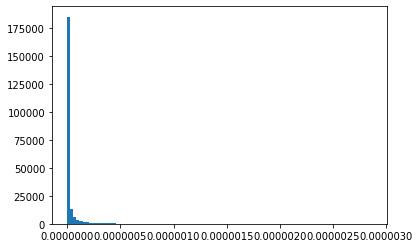

In [58]:
plt.hist(data.NN2L_PRECC.values.flatten(),bins=100);

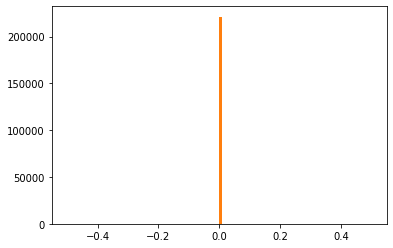

In [63]:
plt.hist(data.NN2L_PRECL.values.flatten(),bins=100);
plt.hist(data2.NN2L_PRECL.values.flatten(),bins=100);

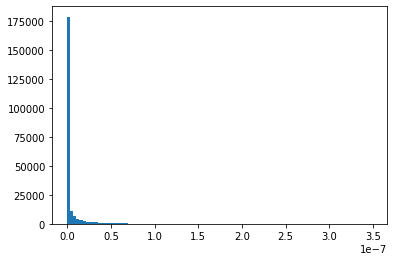

In [65]:
plt.hist(data.NN2L_PRECSC.values.flatten(),bins=100);

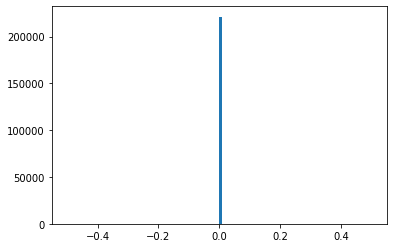

In [66]:
plt.hist(data.NN2L_PRECSL.values.flatten(),bins=100);

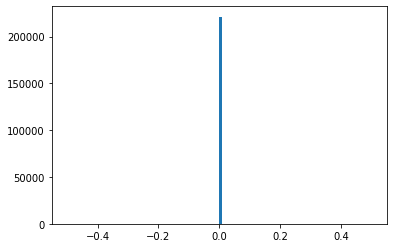

In [67]:
plt.hist(data2.NN2L_PRECSL.values.flatten(),bins=100);

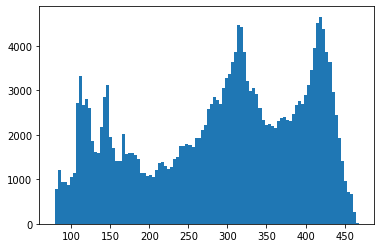

In [60]:
plt.hist(data.NN2L_FLWDS.values.flatten(),bins=100);

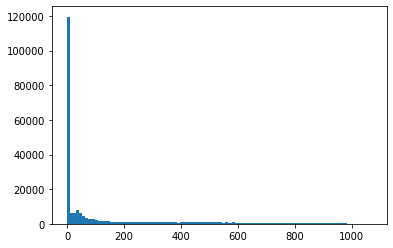

In [61]:
plt.hist(data.NN2L_NETSW.values.flatten(),bins=100);

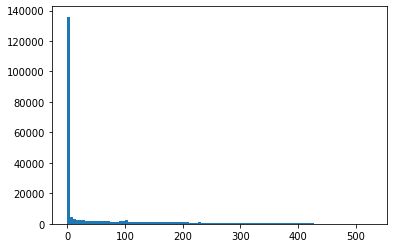

In [69]:
plt.hist(data.NN2L_SOLL.values.flatten(),bins=100);

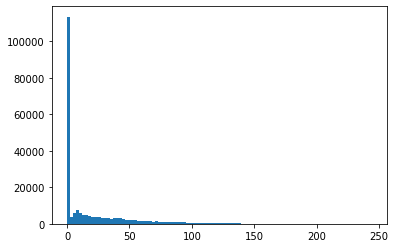

In [70]:
plt.hist(data.NN2L_SOLLD.values.flatten(),bins=100);

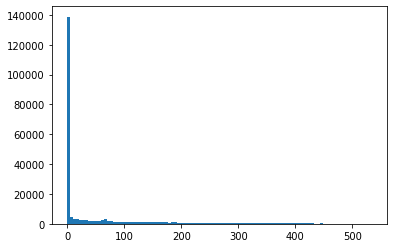

In [71]:
plt.hist(data.NN2L_SOLS.values.flatten(),bins=100);

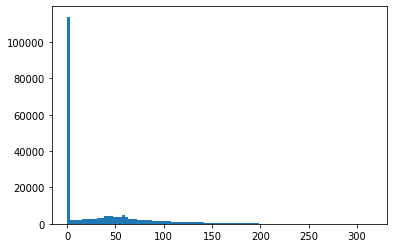

In [72]:
plt.hist(data.NN2L_SOLSD.values.flatten(),bins=100);